
# Project:  Investigating the Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The medical appointment dataset contains information on over 100k appointments in Brazil. The dataset that I have chosen    'No-show appointments' from data set option that udacity gave.. It was created to study what factors were useful in predicting if patients would miss thier appointments.




The questions that I am looking for answers to :          

1- What is the average age who show up? note: in no-show (no means show up) (yes means did not show up)                           
2- Are most patients male or female?            
3- What is the average age of the females?                                                   
4- What is the days of the week that have more no shows than others ?                                     
5- Was the largest percentage of patients coming to their appointments?                                            
6- Does SMS notifications have an effect on show or not show?                  


In [137]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')


<a id='wrangling'></a>
## Data Wrangling

our dataset contains 110527 rows and 14 columns.

I dropped some columns that I don't need in my analysis           
PatientId , AppointmentID , Neighbourhood 

there is no missing values in the dataset so I don't need to drop any thing.

there is incorrect data in age and I solved it in one of the ways which is deletion.

### General Properties

In [138]:
df = pd.read_csv('kagglev2-may-2016.csv')
df.head(10) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



### Data Cleaning (    In the steps below I want to check the dataset (missing values, uniqueness, incorrect data)     and fix it if there any issues  )

In [139]:
# The shape of Data
df.shape

(110527, 14)

There are 110527 patients and 14 columns.

In [140]:
# Statistical analysis
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [142]:
#Drop columns that I don't need in this analysis
df.drop(['PatientId','AppointmentID','Neighbourhood'] , axis=1 ,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [143]:
# Check if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


There is no missing data.

In [144]:
# check the if there is incorrect data
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There is -1 in age! It doesn't make sense, so I will remove it.

In [145]:
df = df[df.Age != -1]
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Here I dropped -1                                                                        
The source: https://hackersandslackers.com/pandas-dataframe-drop/   

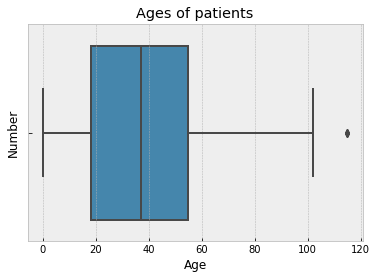

In [146]:
# Here I create a boxplot of the age using seaborn to see outliers from the data
sns.boxplot(df.Age)
plt.title('Ages of patients')
plt.ylabel('Number')
plt.show()

For the 115 year it is make sence because there are people in the world their age more than 115 years.

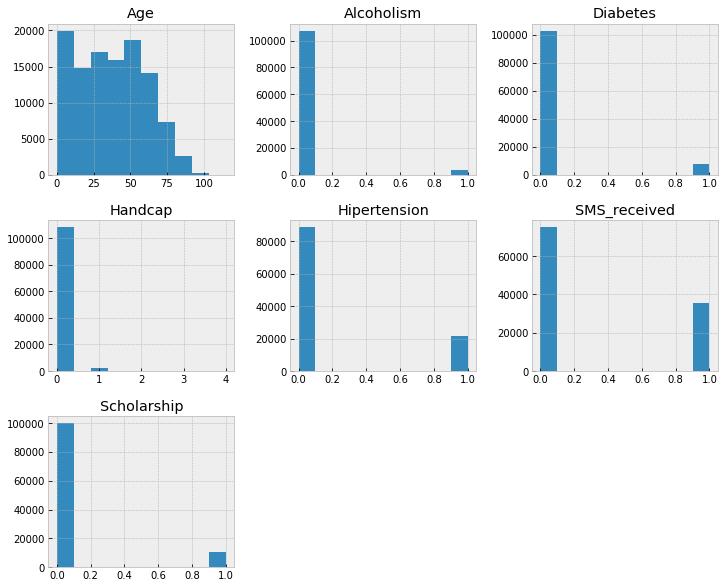

In [147]:
#Here I will show the histogram of each column
df.hist(figsize=(12,10));

<a id='eda'></a>
## Exploratory Data Analysis

The questions that I made to do my analysis.

### Research Question 1 (What is the average age who show up?)

In [148]:
df= df.rename(columns={'No-show' : 'NoShow'})

In [160]:
noShowMean=df.groupby(['NoShow']).Age.mean()
noShowMean

NoShow
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

Average ages of the patients who Shows up is 38 years while those who didn't shows up is 34 year.

I think that older patients are more careful about their appointments because they are at greater risk.

### Research Question 2 (Are most patients male or female?)

Text(0, 0.5, 'Count')

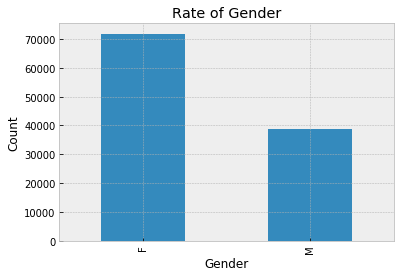

In [150]:
df['Gender'].value_counts().plot(kind = 'bar')
plt.title('Rate of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

It turns out that there are much more female patients than male.

### Research Question 3 (what is the average age of the females?)

In [151]:
df_f = df.query('Gender =="F"')
df_f.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,0,1,0,0,0,0,No


Text(0, 0.5, 'Count')

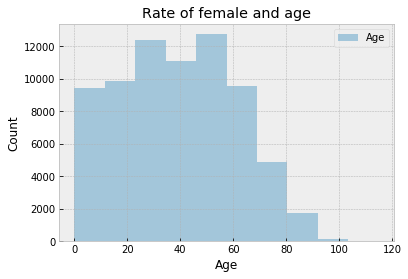

In [162]:
gender=df_f[["Gender", "Age"]].plot.hist(alpha=0.4)
gender
plt.title('Rate of female and age')
plt.xlabel('Age')
plt.ylabel('Count')


The average age OF females is between (25,60) years

### Research Question 4(What is the days of the week that have more no shows than others ?)

In [153]:
# Convert ScheduleDay and AppointmentDay to DateTime object
df.loc[:, ['ScheduledDay', 'AppointmentDay']] = df.loc[:, ['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)

day_from_datetime = lambda dt: dt.weekday_name

df['DayOfWeek'] = df.AppointmentDay.apply(day_from_datetime)

In [154]:
df.DayOfWeek.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


Wednesday and Tuesday were the most common days for appointments.

### Research Question 5(Was the largest percentage of patients coming to their appointments?)

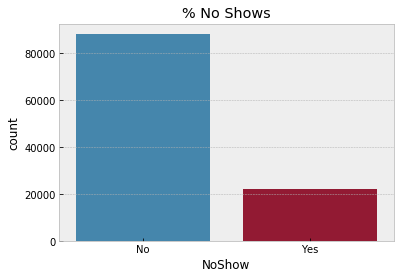

In [155]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title('% No Shows')
plt.show()

Yes, the rate of patient hows show up at their  appointments was large.

### Research Question 6 (Does SMS notifications have an effect on show or not show? )

In [156]:
dfSMS = df.groupby(['SMS_received'])['NoShow'].value_counts()
dfSMS[2:]

SMS_received  NoShow
1             No        25698
              Yes        9784
Name: NoShow, dtype: int64

In [157]:
dfSMS.name=""

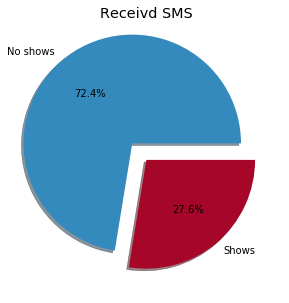

In [158]:
myexplode = [0.2, 0]
show1= dfSMS[2:].plot.pie(figsize=(13,5), labels=['No shows' , 'Shows'] , title= 'Receivd SMS', autopct='%1.1f%%', explode = myexplode, shadow=True)
plt.show()

Suprisingly, that the large percentage of those who received SMS didn't come to their appointments (No shows).

<a id='conclusions'></a>
## Conclusions

Based on the given data and the analyzes that I did :

-It turns out that the older patients are the most keen to attend their appointments, and I think the reason for their keenness is that their exposure to risk at an advanced age is greater than others.

-The number of appointments varies according to the days of the week, the least of which was on Saturday.

-What was really shocking and against expectations was that a large percentage of those who received SMS reminding them of their appointments were the ones who missed it.


Limitations and missing information :

1- if we have a column for if the clinic in the same area for the patient or not it will help us to find if there is a relation if clinic is near for patient or no regarding to show up.

2- price of scholarship would be a good indecator to look at.

3- level education would be interesting metric to look at.



 
 
 The source of the sheets style https://matplotlib.org/3.3.3/gallery/style_sheets/style_sheets_reference.html


In [159]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0